In [1]:
%matplotlib inline
%autosave 0

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split


Autosave disabled


In [2]:
data = loadmat("/Users/nunopires/Documents/Coursera/machine-learning-ex6/ex6/ex6data2.mat",
       matlab_compatible = True)

print(data.keys())

X = data['X']
y = data['y'][:,0]

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [8]:
def plotBoundary(X, y, svm, mesh = 200):
    '''Plots the SVM boundary.'''
    
    x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), mesh)
    x2 = np.linspace(min(X[:, 1]), max(X[:, 1]), mesh) 
    
    h = []
    for i in x1:
        for j in x2:
            h.append(np.array([i,j]))
            
    z = svm.predict(h).reshape(len(x1), len(x2), order = 'F')
    ''' !! Careful with order or reshape. Preset option 'C' did not work !!'''
    
    # Plot
    on = y == 1 # positives
    off = y == 0 # negatives

    bound = plt.contour(x1, x2, z,
                    levels = [0.5], color = 'red')
    # plt.pcolormesh(x1, x2, z) # alternative
    plt.plot(X[on, 0], X[on, 1], 'x', color = 'blue'); # Y positives
    plt.plot(X[off, 0], X[off, 1], '+', color = 'green'); # Y negatives

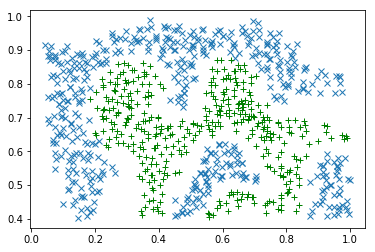

In [4]:
pos = X[y == 1 ,]
neg = X[y == 0 ,]

plt.plot(pos[:,0], pos[:,1], 'x');
plt.plot(neg[:,0], neg[:,1], '+', color = 'green');

[Sklearn guide](http://scikit-learn.org/stable/modules/svm.html)

In [5]:
# Test various C and gamma values
# Could also use gridSearch function from sklearn

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.33, random_state=42)

vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

out = []
for C in vals:
    for sigma in vals:
                
        gamma = 1 / (2 * sigma**2)
        
        clf = svm.SVC(C = C, gamma = gamma)
        clf.fit(X_train, y_train)
        out.append([C, sigma, gamma, clf.score(X_val, y_val)])
        
out = np.array(out)
(a, b, c, d) = out[out[:,3].argmax(),:]

print('Best parameters are C = %1.2f, sigma = %1.2f (-> gamma = %1.1f); score = %1.4f' % (a, b, c, d))

Best parameters are C = 1.00, sigma = 0.03 (-> gamma = 555.6); score = 0.9930


In [6]:
# SVM Parameters
C = 1; gamma = 555;

clf = svm.SVC(C = C, kernel='rbf', gamma = gamma, probability  = True)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=555, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

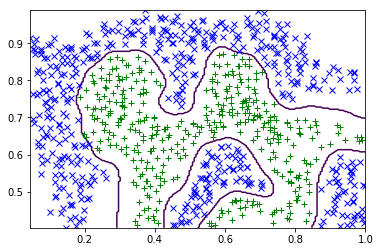

In [9]:
a = plotBoundary(X, y, clf, mesh = 200)